# Customer Support Tickets

## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #conda install -c conda-forge matplotlib
import seaborn as sns #conda install -c anaconda seaborn

## Features Description:
- Ticket ID: A unique identifier for each ticket.
- Customer Name: The name of the customer who raised the ticket.
- Customer Email: The email address of the customer (Domain name - @example.com is intentional for user data privacy concern).
- Customer Age: The age of the customer.
- Customer Gender: The gender of the customer.
- Product Purchased: The tech product purchased by the customer.
- Date of Purchase: The date when the product was purchased.
- Ticket Type: The type of ticket (e.g., technical issue, billing inquiry, product inquiry).
- Ticket Subject: The subject/topic of the ticket.
- Ticket Description: The description of the customer's issue or inquiry.
- Ticket Status: The status of the ticket (e.g., open, closed, pending customer response).
- Resolution: The resolution or solution provided for closed tickets.
- Ticket Priority: The priority level assigned to the ticket (e.g., low, medium, high, critical).
- Ticket Channel: The channel through which the ticket was raised (e.g., email, phone, chat, social media).
- First Response Time: The time taken to provide the first response to the customer.
- Time to Resolution: The time taken to resolve the ticket.
- Customer Satisfaction Rating: The customer's satisfaction rating for closed tickets (on a scale of 1 to 5).

## Reading Data

In [2]:
# Reading the data
df = pd.read_csv('customer_support_tickets.csv')

In [3]:
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [24]:
# We identified that column "Ticket Description" must contain the name of the product stored in column "Product Purchased"
# Let's correct it:

def replace_product(row):
    return row["Ticket Description"].replace('{product_purchased}', row['Product Purchased'])

# Apply the replace_product function to correct the dataset:
df["Ticket Description"] = df.apply(replace_product, axis=1)

df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,cleaned_column,tokenized_column,filtered_tokens
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the GoPro Hero. Pleas...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN,im having an issue with the productpurchased p...,"[im, having, an, issue, with, the, productpurc...","[im, issue, productpurchased, please, assist, ..."
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the LG Smart TV. Plea...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN,im having an issue with the productpurchased p...,"[im, having, an, issue, with, the, productpurc...","[im, issue, productpurchased, please, assist, ..."
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my Dell XPS. The Del...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,im facing a problem with my productpurchased t...,"[im, facing, a, problem, with, my, productpurc...","[im, facing, problem, productpurchased, produc..."
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the Microsoft Office....,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,im having an issue with the productpurchased p...,"[im, having, an, issue, with, the, productpurc...","[im, issue, productpurchased, please, assist, ..."
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the Autodesk AutoCAD....,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,im having an issue with the productpurchased p...,"[im, having, an, issue, with, the, productpurc...","[im, issue, productpurchased, please, assist, ..."


## EDA

In [8]:
# Function to check the dataset size
df.shape

(8469, 17)

In [4]:
# Function to check the data type of each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [28]:
# Function to check missing values
df.isna().sum()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64

In [17]:
df["Date of Purchase"].min()

'2020-01-01'

In [16]:
df["Date of Purchase"].max()

'2021-12-30'

In [21]:
# Checking the different values of each category
df['Ticket Status'].unique()

array(['Pending Customer Response', 'Closed', 'Open'], dtype=object)

In [23]:
df['Ticket Type'].value_counts()

Refund request          1752
Technical issue         1747
Cancellation request    1695
Product inquiry         1641
Billing inquiry         1634
Name: Ticket Type, dtype: int64

In [26]:
df['Ticket Subject'].value_counts()

Refund request              576
Software bug                574
Product compatibility       567
Delivery problem            561
Hardware issue              547
Battery life                542
Network problem             539
Installation support        530
Product setup               529
Payment issue               526
Product recommendation      517
Account access              509
Peripheral compatibility    496
Data loss                   491
Cancellation request        487
Display issue               478
Name: Ticket Subject, dtype: int64

In [27]:
df['Ticket Priority'].value_counts()

Medium      2192
Critical    2129
High        2085
Low         2063
Name: Ticket Priority, dtype: int64

In [28]:
df['Ticket Channel'].value_counts()

Email           2143
Phone           2132
Social media    2121
Chat            2073
Name: Ticket Channel, dtype: int64

In [19]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ticket ID,8469.0,4235.000000,2444.934048,1.0,2118.0,4235.0,6352.0,8469.0
Customer Age,8469.0,44.026804,15.296112,18.0,31.0,44.0,57.0,70.0
Customer Satisfaction Rating,2769.0,2.991333,1.407016,1.0,2.0,3.0,4.0,5.0


## Data Visualization

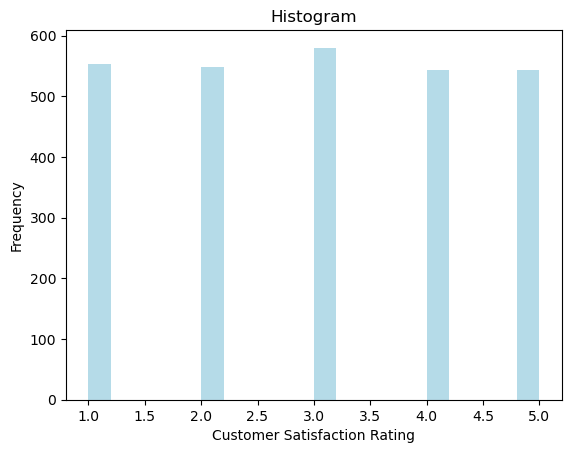

In [31]:
# Histogram using Matplotlib

plt.hist(df["Customer Satisfaction Rating"], bins=20, facecolor="lightblue", alpha=0.9)
plt.xlabel("Customer Satisfaction Rating")
plt.ylabel("Frequency")
plt.title("Histogram");

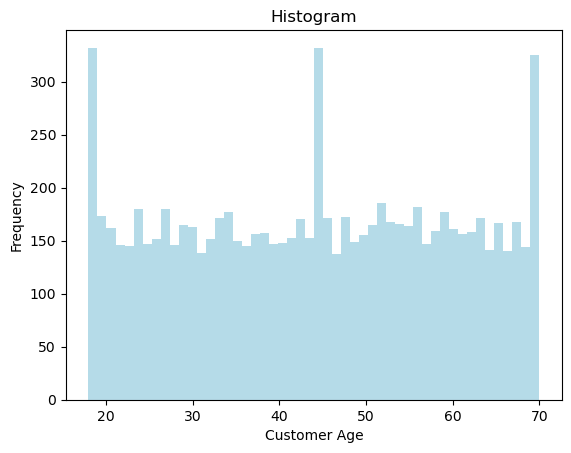

In [43]:
# Histogram using Matplotlib

plt.hist(df["Customer Age"], bins=50, facecolor="lightblue", alpha=0.9)
plt.xlabel("Customer Age")
plt.ylabel("Frequency")
plt.title("Histogram");

<Axes: xlabel='Ticket Type', ylabel='Customer Satisfaction Rating'>

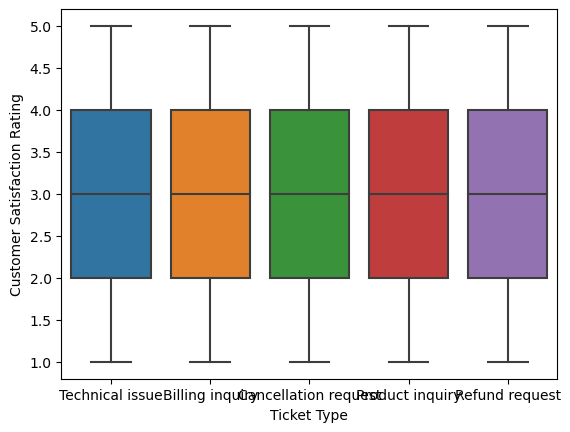

In [53]:
# Histogram using Seaborn

sns.boxplot(y=df["Customer Satisfaction Rating"], x=df["Ticket Type"])

Text(0.5, 1.0, 'Products with most Tickets')

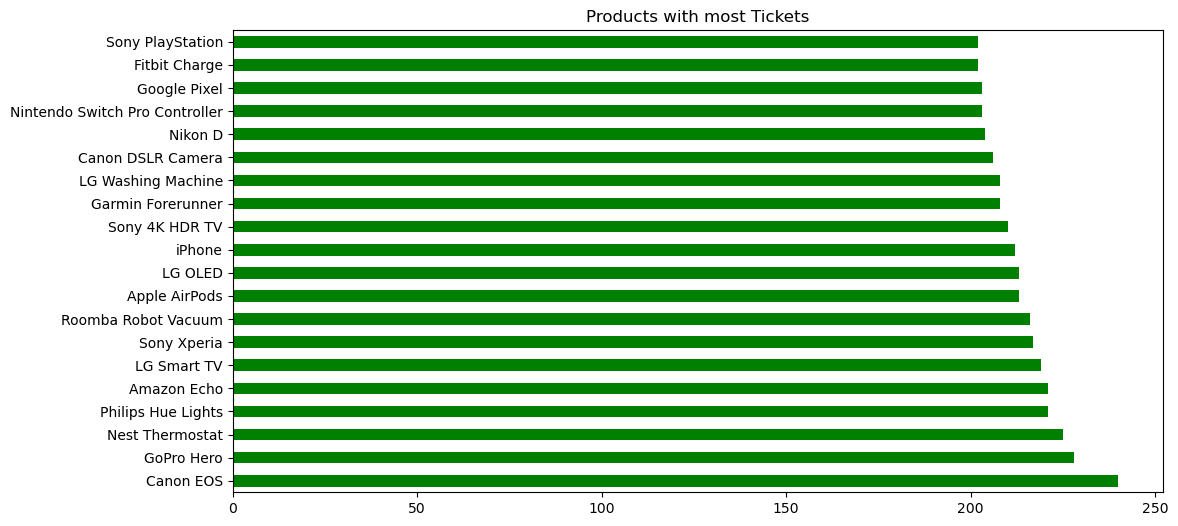

In [48]:
# Tickets by Product Purchased

plt.figure(1, figsize=(12, 6))
df["Product Purchased"].value_counts()[:20].plot(kind="barh", color="green")
plt.title("Products with most Tickets")

In [47]:
# Calculate the average/median tickets by Product Purchased

df["Product Purchased"].value_counts()

# Suggestion -> Categorize the products and compare the average tickets by category;
# Suggestion -> Cross the data with the amount of the products sold;

Canon EOS                         240
GoPro Hero                        228
Nest Thermostat                   225
Philips Hue Lights                221
Amazon Echo                       221
LG Smart TV                       219
Sony Xperia                       217
Roomba Robot Vacuum               216
Apple AirPods                     213
LG OLED                           213
iPhone                            212
Sony 4K HDR TV                    210
Garmin Forerunner                 208
LG Washing Machine                208
Canon DSLR Camera                 206
Nikon D                           204
Nintendo Switch Pro Controller    203
Google Pixel                      203
Fitbit Charge                     202
Sony PlayStation                  202
HP Pavilion                       200
Microsoft Office                  200
Amazon Kindle                     198
Google Nest                       198
Dyson Vacuum Cleaner              198
Bose SoundLink Speaker            197
Autodesk Aut

## Text Mining

In [4]:
#Import libraries
import re
import nltk # !pip install nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer  #nltk.download('all')

Preprocessing Text:

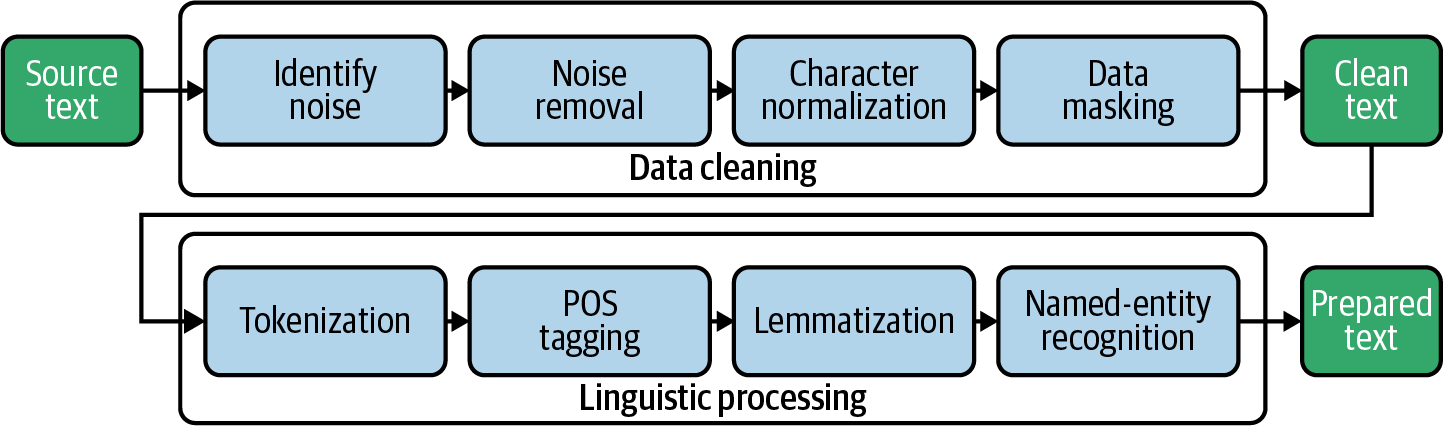

Source: https://www.oreilly.com/api/v2/epubs/9781492074076/files/assets/btap_0401.png

#### Noise removal and Character normalization

In [25]:
# Removing non-desirable characters (0-9, @, #, emojis, etc.)

# Remove non-desirable characters using regex

def clean_regex(text):
    if not text:
        print('The text to be tokenized is a None type. Defaulting to blank string.')
        text = ''
    return re.sub(r'[^a-zA-Z\s]', '', text)

df['cleaned_column'] = df["Ticket Description"].apply(clean_regex)


# Normalizing capital letters
df['cleaned_column'] = df['cleaned_column'].str.lower()
df['cleaned_column']

0       im having an issue with the gopro hero please ...
1       im having an issue with the lg smart tv please...
2       im facing a problem with my dell xps the dell ...
3       im having an issue with the microsoft office p...
4       im having an issue with the autodesk autocad p...
                              ...                        
8464    my lg oled is making strange noises and not fu...
8465    im having an issue with the bose soundlink spe...
8466    im having an issue with the gopro action camer...
8467    im having an issue with the playstation please...
8468    there seems to be a hardware problem with my p...
Name: cleaned_column, Length: 8469, dtype: object

#### Tokenization

In [26]:
# Process of breaking text paragraphs into words

# Tokenize the text
def custom_tokenize(text):
    if not text:
        print('The text to be tokenized is a None type. Defaulting to blank string.')
        text = ''
    return word_tokenize(text)
df['tokenized_column'] = df['cleaned_column'].apply(custom_tokenize)
df['tokenized_column']

0       [im, having, an, issue, with, the, gopro, hero...
1       [im, having, an, issue, with, the, lg, smart, ...
2       [im, facing, a, problem, with, my, dell, xps, ...
3       [im, having, an, issue, with, the, microsoft, ...
4       [im, having, an, issue, with, the, autodesk, a...
                              ...                        
8464    [my, lg, oled, is, making, strange, noises, an...
8465    [im, having, an, issue, with, the, bose, sound...
8466    [im, having, an, issue, with, the, gopro, acti...
8467    [im, having, an, issue, with, the, playstation...
8468    [there, seems, to, be, a, hardware, problem, w...
Name: tokenized_column, Length: 8469, dtype: object

#### Stop words

In [8]:
# Removing english stop words or any other non-desirable word like "productpurchased"

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [27]:
# Function to filter stopwords
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return filtered_tokens

# Apply remove_stopwords function to tokenized_column
df['filtered_tokens'] = df['tokenized_column'].apply(remove_stopwords)
df['filtered_tokens']

0       [im, issue, gopro, hero, please, assist, billi...
1       [im, issue, lg, smart, tv, please, assist, nee...
2       [im, facing, problem, dell, xps, dell, xps, tu...
3       [im, issue, microsoft, office, please, assist,...
4       [im, issue, autodesk, autocad, please, assist,...
                              ...                        
8464    [lg, oled, making, strange, noises, functionin...
8465    [im, issue, bose, soundlink, speaker, please, ...
8466    [im, issue, gopro, action, camera, please, ass...
8467    [im, issue, playstation, please, assist, dont,...
8468    [seems, hardware, problem, philips, hue, light...
Name: filtered_tokens, Length: 8469, dtype: object

#### Frequency Distribution (Bag of words)

In [28]:
# Importing library
from nltk.probability import FreqDist

# Combine all tokens from different rows into a single list
all_tokens = [token for sublist in df['filtered_tokens'] for token in sublist]

# Create FreqDist for all_tokens
fdist = FreqDist(all_tokens)

# Get the 20 most common words
common_words = fdist.most_common(20)
print(common_words)

[('issue', 11530), ('im', 10287), ('please', 8808), ('assist', 6250), ('ive', 6001), ('problem', 2285), ('product', 2270), ('data', 1654), ('software', 1552), ('account', 1461), ('steps', 1390), ('noticed', 1208), ('persists', 1178), ('help', 1176), ('resolve', 1165), ('update', 1155), ('would', 1122), ('device', 1106), ('unable', 1088), ('could', 1057)]


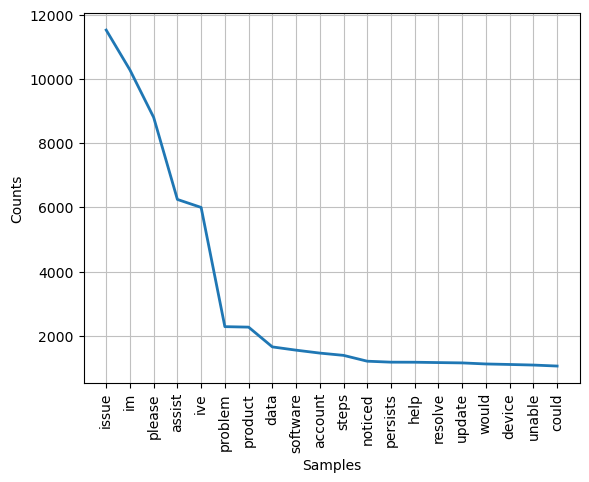

<Axes: xlabel='Samples', ylabel='Counts'>

In [29]:
# Chart
import matplotlib.pyplot as plt
plt.figure()
fdist.plot(20,cumulative=False)

#### Word Cloud

In [30]:
# Wordcloud
from wordcloud import WordCloud #python -m pip install wordcloud or !pip install wordcloud
wc = WordCloud()
img = wc.generate_from_text(' '.join(all_tokens))
img.to_file('worcloud.jpeg')

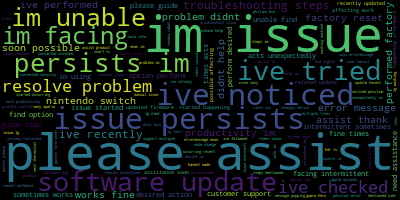

In [31]:
from IPython.display import display

# Display the word cloud image in the notebook
display(img.to_image())

#### Stemming

In [70]:
# Reducing words to their word root word

#### (or) Lemmatization

In [13]:
# Lemmatization reduces words to their base word, which is linguistically correct lemmas. 
# It transforms the root word with the use of vocabulary and morphological analysis.



#### New Frequency Distribution (Bag of words)

#### New Word Cloud

## Sentimental Analysis